In [91]:
import pandas as pd
from sklearn.datasets import load_iris
ir = load_iris()

In [92]:
len(ir)

8

In [93]:
dir(ir)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [95]:
df=pd.DataFrame(ir.data, columns=ir.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
df['target'] = ir.target

In [98]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [101]:
df['flower_name'] = df.target.apply(lambda x: ir.target_names[x])
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [103]:
df0 = df[:50]
df1 = df[50:100]
df3 = df[100:]

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sepal length Vs Sepal width(Setosa vs Versicolor)

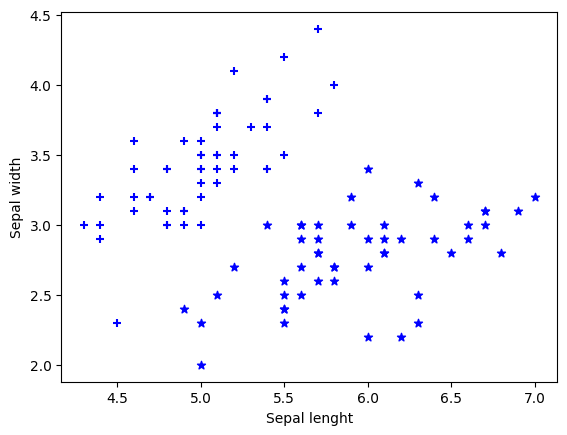

In [105]:
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'] , color='blue', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'] , color='blue', marker='*')

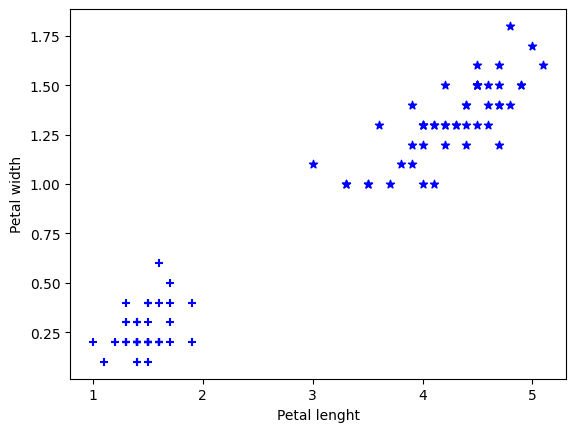

In [106]:
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'] , color='blue', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'] , color='blue', marker='*')

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
X=df.drop(['target', 'flower_name'], axis='columns')
y=df.target

In [112]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Create KNN (K Nearest Neighbors Classifiers)

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [122]:
knn.score(X_test, y_test)

0.98

In [125]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm=confusion_matrix(y_test, y_predicted)
cm

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

Text(58.222222222222214, 0.5, 'Truth')

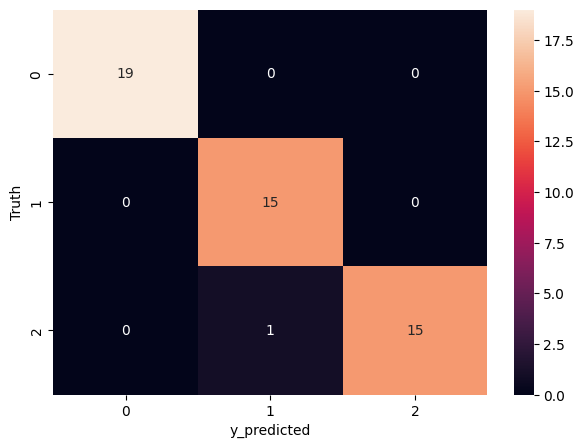

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("y_predicted")
plt.ylabel("Truth")

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

